<img src="../../_images/logos/Scikit_learn.png" width="200px" />

# Scikit-learn - Topic 3 - Tree-based models for Regression and Classification

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%202%20-%20Unit%20Objective.png"> 

## Topic Objectives

* Implement and Evaluate Tree-Based Models for Regression and Classification


---

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%204%20-%20Import%20Package%20for%20Learning.png"> 

## Import Packages for Learning

We will install scikit-learn, xgboost, feature-engine and yellow brick to run our exercises.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')

---

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> 

## Scikit-learn - Topic 3 - Tree-based models for Regression and Classification

In this topic, we will cover the practical steps and code for fitting a pipeline considering Tree-based models, such as Decision Trees and Random Forests.
* If you want to revise the algorithm content, refer to the Algorithm video topic. 

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> 

A typical workflow used for supervised learning is
* Split the dataset into train and test set
* Fit the pipeline
* Evaluate your model. If the performance is not good, revisit the process, starting from defining the business case, collecting the data, conducting EDA (Exploratory Data Analysis), etc.


<img width="3%" height="3%" align="top"  src=" https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Challenge%20test.png
"> 

For teaching purposes, **we will use a fixed dataset for Regression and a fixed dataset for Classification across the different algorithms used in this notebook.**

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> 

We will use the California Housing dataset from sklearn for the **Regression task**. 
* It has house age records and characteristics, like the average number of rooms per dwelling and population in California.
* We'll use the same code from the previous unit.

In [40]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
df_reg = pd.DataFrame(data.data,columns=data.feature_names)
df_reg['price'] = pd.Series(data.target)

df_reg = df_reg.sample(frac=0.5, random_state=101)

print(df_reg.shape)
df_reg.head(3)

(10320, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
16086,5.6204,36.0,6.110738,0.979866,742.0,2.489933,37.73,-122.49,4.06200
8816,11.6677,37.0,7.605634,0.950704,366.0,2.577465,33.75,-118.32,5.00001
7175,2.4375,47.0,4.896154,1.015385,1193.0,4.588462,34.05,-118.19,1.22900


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> 

We will use the Iris dataset from seaborn for the **Classification task**. 
* It contains records of three varieties of iris plants, with their petal and sepal measurements.

In [41]:
df_clf = sns.load_dataset('iris').sample(frac=0.7, random_state=101)
print(df_clf.shape)
df_clf.head(3)

(105, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
33,5.5,4.2,1.4,0.2,setosa
16,5.4,3.9,1.3,0.4,setosa
43,5.0,3.5,1.6,0.6,setosa


<img width="3%" height="3%" align="top"  src=" https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Challenge%20test.png
">

We will cover the following tree algorithms, which include ensemble tree algorithms.
* Decision Tree
* Random Forest
* Gradient Boosting
* Ada Boost
* XG Boost (eXtreme Gradient Boost)
* Extra Tree


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> 

For teaching purposes, we will use:
* **Classification** task for Decision Tree, Gradient Boosting and XG Boost.
* **Regression** task for Random Forest, Ada Boost and Extra Tree.

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%206%20-%20Warning.png"> 

That speeds up our learning process. And, if you do Regressor using a Decision Tree, the code and workflow are the same as you would do for Classification using a Decision Tree.

---

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png">  

### Decision Tree

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> 

You can refer to the Algorithms lesson to refresh the algorithms we cover. We are not going deep into the mathematical functions; the idea is to present the concept and the algorithm application.

* In a nutshell, a decision tree is like a flow chart, where each question has a yes/no answer. As you get deeper, you move from a general question to a very specific question. The questions asked must be ones where the yes or no answer gives useful insights into the data.

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> 

When using the decision tree algorithm in Scikit-learn, you will import a different estimator depending on your task (regression or classification).
* There is the suffix "`Regressor`" in the estimator when the algorithm will be used for a regression task, and, as you may expect, there is the suffix "`Classifier`" in the estimator when the algorithm is used for the classification task.
* That pattern repeats for the other tree-based algorithm.
* The difference is subtle. However, it is worth pointing out.

Find here the documentation for both [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).
* We will import both but will use the `DecisionTreeClassifier` for the exercise.

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

Let's reinspect our data again.
* The target variable is 'species', and we don't have missing data.

In [43]:
df_clf.head()

,sepal_length,sepal_width,petal_length,petal_width,species
33,5.5,4.2,1.4,0.2,setosa
16,5.4,3.9,1.3,0.4,setosa
43,5.0,3.5,1.6,0.6,setosa
129,7.2,3.0,5.8,1.6,virginica
50,7.0,3.2,4.7,1.4,versicolor


We are getting more comfortable with ML, but it is worth remembering that this exercise is an example of supervised learning, where the ML task is classification. The same principle applies when the ML task is Regression.
* For that workflow, it is wise to split the data into train and test sets.
* In the previous units, we explained the `train_test_split() `function. From now on, we will state, "We split the data into train and test sets"

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(
                                    df_clf.drop(['species'],axis=1),
                                    df_clf['species'],
                                    test_size=0.2,
                                    random_state=101
                                    )

print("* Train set:", X_train.shape, y_train.shape, "\n* Test set:",  X_test.shape, y_test.shape)

* Train set: (84, 4) (84,) 
* Test set: (21, 4) (21,)


In this example, we are using a clean, complete data set, so we will not need the data cleaning or feature engineering steps.
* We then set feature scaling, feature selection and modelling using the DecisionTreeClassifier. We set random_state so that the results will be reproducible anywhere. We chain these steps in a sklearn Pipeline.

In [45]:
from sklearn.pipeline import Pipeline

### Feat Scaling
from sklearn.preprocessing import StandardScaler

### Feat Selection
from sklearn.feature_selection import SelectFromModel

### ML algorithms 
from sklearn.tree import DecisionTreeClassifier


def pipeline_decision_tree_clf():
  pipeline = Pipeline([
      ( "feat_scaling",StandardScaler() ),

      ( "feat_selection",SelectFromModel(DecisionTreeClassifier(random_state=101)) ),
      
      ( "model", DecisionTreeClassifier(random_state=101)),

    ])

  return pipeline

pipeline_decision_tree_clf()

,steps,"[('feat_scaling', ...), ('feat_selection', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,estimator,DecisionTreeC...dom_state=101)
,threshold,None
,prefit,False
,norm_order,1


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> 

It is time to fit the pipeline so that the model can learn the relationships between the features and the target. We create a variable pipeline (it could have any name) and call the function where we set our pipeline.

In [46]:
pipeline = pipeline_decision_tree_clf()
pipeline.fit(X_train, y_train)

,steps,"[('feat_scaling', ...), ('feat_selection', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,estimator,DecisionTreeC...dom_state=101)
,threshold,None
,prefit,False
,norm_order,1


Like in the previous notebook, we are now interested in starting to evaluate the pipeline. Since it is a tree-based model, we can assess the importance of the features in the model using `.features_importance_`
* We created a custom function to assess feature importance on tree-based models. It takes the model and the variables that "hit" the model. Check the pseudo-code, comments and docstrings to understand the logic.
* Don't worry if you don't understand at first.  Expect it to take some time to absorb.

In [47]:
def feature_importance_tree_based_models(model, columns):
  """
  Gets the model and the columns used to train the model
  - We use the model.feature_importances_ and columns to make a
  DataFrame that shows the importance of each feature
  - Next, we print the feature name and its relative importance order,
  followed by a barplot indicating the importance

  """

  # create DataFrame to display feature importance
  df_feature_importance = (pd.DataFrame(data={
      'Features': columns,
      'Importance': model.feature_importances_})
  .sort_values(by='Importance', ascending=False)
  )

  best_features = df_feature_importance['Features'].to_list()

  # Most important features statement and plot
  print(f"* These are the {len(best_features)} most important features in descending order. "
        f"The model was trained on them: \n{df_feature_importance['Features'].to_list()}")

  df_feature_importance.plot(kind='bar',x='Features',y='Importance')
  plt.show()


Let's check that.
* The `model` argument is the 'model' step from the pipeline (we don't parse the pipeline since we need only the model step)
* In the `columns` argument, we subset the feature selection step where we grab a boolean array informing which features hit the model - pipeline['feat_selection'].get_support(). This array is used to subset the features from train set columns.
* Note that only two features - `['petal_width', 'petal_length']` - out of four were used to train the model, and they have roughly similar relevance

* These are the 2 most important features in descending order. The model was trained on them: 
['petal_width', 'petal_length']


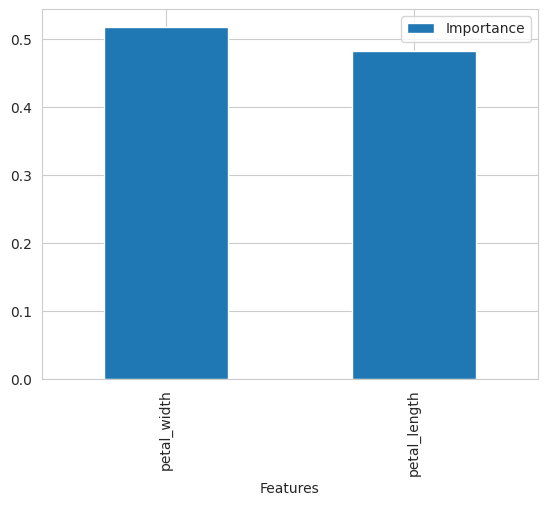

In [48]:
feature_importance_tree_based_models(model = pipeline['model'],
                                     columns =  X_train.columns[pipeline['feat_selection'].get_support()]
                                     )

It is time to evaluate the classifier. We are using the same custom function for this purpose as in the last notebook.

In [49]:
# loads confusion_matrix and classification_report from sklearn
from sklearn.metrics import classification_report, confusion_matrix

def confusion_matrix_and_report(X,y,pipeline,label_map):
  """
  Gets features, target, pipeline and how labelled (named) the levels from your target

  - it predicts based on features
  - compare predictions and actuals in a confusion matrix
    - the first argument stays as rows and the second stay as columns in the matrix
    - we will use the pattern where the predictions are in the row and actual values are in the columns
    - to refresh that, revert to the Performance Metric video in Module 2
  - show classification report

  """

  prediction = pipeline.predict(X)

  print('---  Confusion Matrix  ---')
  print(pd.DataFrame(confusion_matrix(y_true=prediction, y_pred=y),
        columns=[ ["Actual " + sub for sub in label_map] ], 
        index= [ ["Prediction " + sub for sub in label_map ]]
        ))
  print("\n")


  print('---  Classification Report  ---')
  print(classification_report(y, prediction, target_names=label_map),"\n")



def clf_performance(X_train,y_train,X_test,y_test,pipeline,label_map):
  """
  gets the features and target from train and test set, pipeline how
  you labelled (named) the levels from your target
  - for each set (train and test), it calls the function above to show the confusion matrix
  and classification report for both train and test set
  """

  print("#### Train Set #### \n")
  confusion_matrix_and_report(X_train,y_train,pipeline,label_map)

  print("#### Test Set ####\n")
  confusion_matrix_and_report(X_test,y_test,pipeline,label_map)

You will notice that in this dataset, the target variable wasn't a set of numbers referring to classes, but rather, strings.
* We are parsing, from df_clf, the unique values from the target as the `label_map` parameter.

In [50]:
df_clf['species'].unique()

array(['setosa', 'virginica', 'versicolor'], dtype=object)

Let's evaluate the classifier then
* Note the model aced all predictions in the train set, which is an indication that it learned all the relationships from the training data. That is good, but let's check on the test set
* As we may expect, the performance on the test set was a bit lower (we noticed that in the confusion matrix, where Virginica and Versicolor have the wrong predictions). At the same time, it is still very good, and it is not much of a difference from the train set. It is a good indication that the model didn't overfit.

In [51]:
clf_performance(X_train=X_train, y_train=y_train,
                X_test=X_test, y_test=y_test,
                pipeline=pipeline,
                label_map= df_clf['species'].unique()
                )

#### Train Set #### 

---  Confusion Matrix  ---
                      Actual setosa Actual virginica Actual versicolor
Prediction setosa                30                0                 0
Prediction virginica              0               26                 0
Prediction versicolor             0                0                28


---  Classification Report  ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        30
   virginica       1.00      1.00      1.00        26
  versicolor       1.00      1.00      1.00        28

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84
 

#### Test Set ####

---  Confusion Matrix  ---
                      Actual setosa Actual virginica Actual versicolor
Prediction setosa                 8                0                 0
Prediction virginica              0                7         

One additional aspect when using DecisionTree, is to visualise the created tree.
* Sckit learn has a `plot_tree()` function that is okay and can help us. The documentation is [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html). We parse:
* decision_tree as the model step in our pipeline
* feature_names as the variable used to train the model. That is done by extracting the information from the feature selection step
* class_names are taken from unique values from species
* The remaining arguments help us to get a cleaner visualisation

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%206%20-%20Warning.png"> 

Just a side note, this decision tree is simple, however, when it comes to big trees, the visualisation might become too big or more difficult to interpret.
* In this example, the decision is made first on petal_width. If it is smaller than -0.47, it is Setosa; if not, it goes to another decision-making point. The other decision is for petal_length. If it is smaller than -0.57, it is Virginica; otherwise, it is Versicolor.

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%206%20-%20Warning.png"> 

**Note the beauty: the algorithm computed the pattern by itself and now can predict. That is the major difference between ML and traditional programming. Here, we have data and an objective (predict species), and then the computer finds the best rule for that. In traditional programming, the developer has to set the rules**

* However, the decision points are still weird. What does a -0.47 mean for petal_width? It's a negative value. Let's explore the next cell.

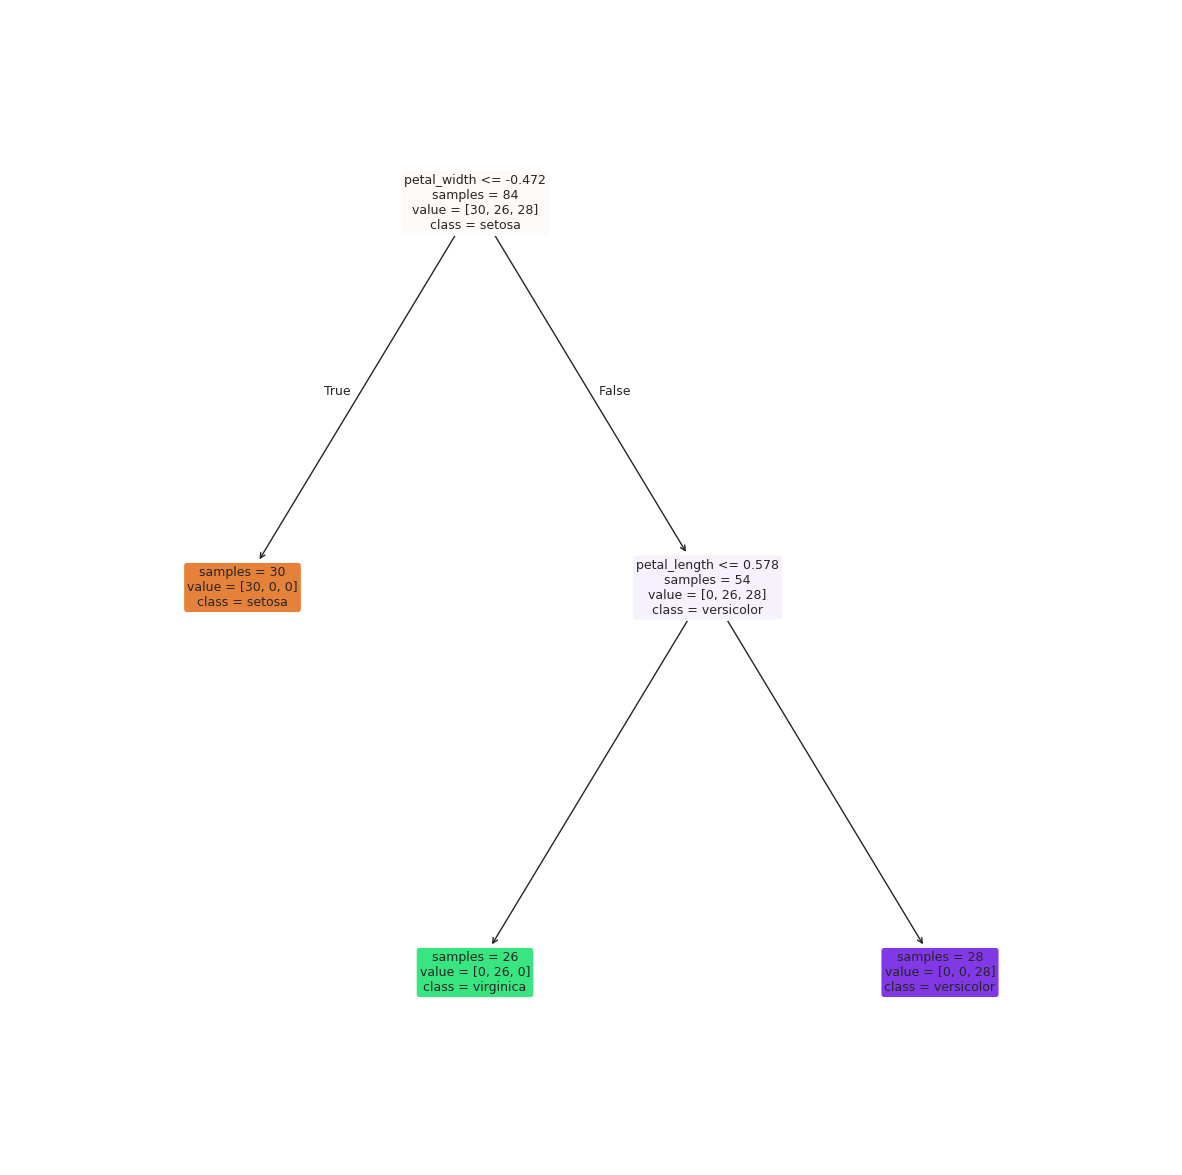

In [52]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))
tree.plot_tree(decision_tree = pipeline['model'], 
               feature_names = X_train.columns[pipeline['feat_selection'].get_support()],
               class_names = df_clf['species'].unique(),
               filled=True,
               rounded=True,
               fontsize=9,
               impurity=False)
plt.show()

The negative values from the previous case occur because the feature scaling step scaled the data using a standard scaler. We can grab this pipeline step and use .inverse_transformation() to convert the scaled value to the original.

- We create a DataFrame that relates to the original data. For petal_width and petal_length we set the decision points from the previous map. We parse the DataFrame to .inverse_transform
- The decision points are actually 5.4 for petal_width, 3.3 for petal_length

In [53]:
scaled_data = pd.DataFrame(data={'petal_width':-0.472,
                                 'petal_length':0.578,
                                 'sepal_length':1.0, # this value doesn't matter, but needs to be here
                                 'sepal_width':1.0}, # this value doesn't matter, but needs to be here
                           index=[0])


pipeline['feat_scaling'].inverse_transform(scaled_data)

array([[5.41951631, 3.30218132, 5.51251128, 1.9317954 ]])

---

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png">  

### Random Forest

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> 

You can refer back to the Algorithms lesson to refresh the algorithms we will cover. We are not going deep into the mathematical functions; the idea is to present the concept and the algorithm application.

* The random forest is made of many decision trees, and it is an ensemble method. It uses bagging and feature randomness when building each tree, aiming to create an uncorrelated collection of trees where the prediction from the set of trees is more accurate than that of any individual tree.

Once again, the same algorithm has a different estimator depending on the tasks: Regression or Classification. Find the documentation here for both, [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).
* We will import both but will use `RandomForestRegressor` for the exercise.

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

 We will use the California Housing dataset to fit an ML pipeline to predict the sales price using the Random Forest Algorithm.

In [55]:
df_reg.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
16086,5.6204,36.0,6.110738,0.979866,742.0,2.489933,37.73,-122.49,4.06200
8816,11.6677,37.0,7.605634,0.950704,366.0,2.577465,33.75,-118.32,5.00001
7175,2.4375,47.0,4.896154,1.015385,1193.0,4.588462,34.05,-118.19,1.22900
16714,4.3218,17.0,5.805461,1.017065,941.0,3.211604,35.51,-120.68,2.09100
14491,10.0707,22.0,7.906818,1.018182,1252.0,2.845455,32.85,-117.24,5.00001


We split the train and  test sets. The target variable is 'price' 

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(
                                    df_reg.drop(['price'],axis=1),
                                    df_reg['price'],
                                    test_size=0.2,
                                    random_state=101
                                    )

print("* Train set:", X_train.shape, y_train.shape, "\n* Test set:",  X_test.shape, y_test.shape)

* Train set: (8256, 8) (8256,) 
* Test set: (2064, 8) (2064,)


We create the pipeline using a similar structure as the previous example. There are 3 steps: scaling, feature selection and modelling. 
* We know in advance the data doesn't require data cleaning.

In [57]:
from sklearn.pipeline import Pipeline

### Feat Scaling
from sklearn.preprocessing import StandardScaler

### Feat Selection
from sklearn.feature_selection import SelectFromModel

### ML algorithms 
from sklearn.ensemble import RandomForestRegressor


def pipeline_random_forest_reg():
  pipeline = Pipeline([
      ( "feat_scaling",StandardScaler() ),
      ( "feat_selection",SelectFromModel(RandomForestRegressor(random_state=101)) ),
      ( "model", RandomForestRegressor(random_state=101)),

  ])

  return pipeline

pipeline_random_forest_reg()

,steps,"[('feat_scaling', ...), ('feat_selection', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,estimator,RandomForestR...dom_state=101)
,threshold,None
,prefit,False
,norm_order,1


We will fit the pipeline to the train set (features and target) using `.fit()`

In [58]:
pipeline = pipeline_random_forest_reg()
pipeline.fit(X_train, y_train)

,steps,"[('feat_scaling', ...), ('feat_selection', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,estimator,RandomForestR...dom_state=101)
,threshold,None
,prefit,False
,norm_order,1


Since it is a tree-based model, we can assess in the model the importance of the features with .features_importance_, using the custom function from the previous section
* Note that from 8 features, the model was trained on 2: MedInc and AveOccup, where MedInc is more important to the model

* These are the 2 most important features in descending order. The model was trained on them: 
['MedInc', 'AveOccup']


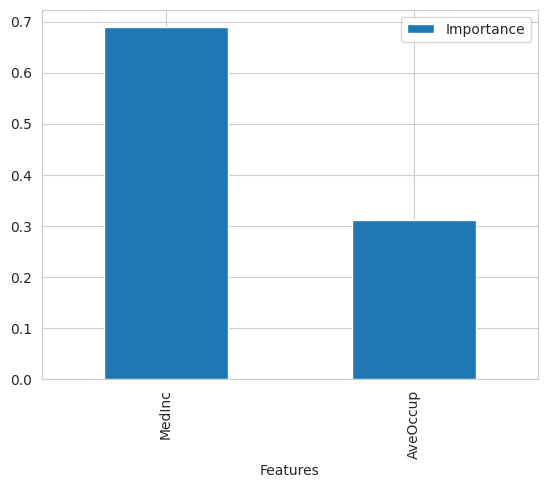

In [59]:
feature_importance_tree_based_models(model = pipeline['model'],
                                     columns =  X_train.columns[pipeline['feat_selection'].get_support()])

We will evaluate the regressor pipeline using the same custom function from the last notebook.

In [60]:
# import regression metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 
# we will use numpy to calculate RMSE based on MSE (mean_squared_error)
import numpy as np


def regression_performance(X_train, y_train, X_test, y_test,pipeline):
  """
  # Gets train/test sets and pipeline and evaluates the performance
  - for each set (train and test) call regression_evaluation()
  which will evaluate the pipeline performance
  """

  print("Model Evaluation \n")
  print("* Train Set")
  regression_evaluation(X_train,y_train,pipeline)
  print("* Test Set")
  regression_evaluation(X_test,y_test,pipeline)



def regression_evaluation(X,y,pipeline):
  """
  # Gets features and target (either from train or test set) and pipeline
  - it predicts using the pipeline and the features
  - calculates performance metrics comparing the prediction to the target
  """
  prediction = pipeline.predict(X)
  print('R2 Score:', round(r2_score(y, prediction), 3))  
  print('Mean Absolute Error:', round(mean_absolute_error(y, prediction),3))  
  print('Mean Squared Error:', round(mean_squared_error(y, prediction),3))  
  print('Root Mean Squared Error:', round(np.sqrt(mean_squared_error(y, prediction)),3))
  print("\n")

  

def regression_evaluation_plots(X_train, y_train, X_test, y_test,pipeline, alpha_scatter=0.5):
  """
  # Gets Train and Test set (features and target), pipeline, and adjust dots transparency 
  at scatter plot
  - It predicts on train and test set
  - It creates Actual vs Prediction scatterplots, for train and test set
  - It draws a red diagonal line. In theory, a good regressor should predict
  close to the actual, meaning the dot should be close to the diagonal red line
  The closer the dots are to the line, the better

  """
  pred_train = pipeline.predict(X_train)
  pred_test = pipeline.predict(X_test)


  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
  sns.scatterplot(x=y_train , y=pred_train, alpha=alpha_scatter, ax=axes[0])
  sns.lineplot(x=y_train , y=y_train, color='red', ax=axes[0])
  axes[0].set_xlabel("Actual")
  axes[0].set_ylabel("Predictions")
  axes[0].set_title("Train Set")

  sns.scatterplot(x=y_test , y=pred_test, alpha=alpha_scatter, ax=axes[1])
  sns.lineplot(x=y_test , y=y_test, color='red', ax=axes[1])
  axes[1].set_xlabel("Actual")
  axes[1].set_ylabel("Predictions")
  axes[1].set_title("Test Set")

  plt.show()

* We notice that the performance on the train set is pretty good (0.93 of R2, MAE of 0.2, the actual vs prediction plot is dense around the diagonal red line). However, R2 on the test set is still ok (0.55) but much lower than on the train set. There is a notable difference. That may be a sign of overfitting.
* We note for the actual vs predictions plots that in the train set, the dots are closer around the diagonal line than they were in the test set. That reinforces the previous point.
* Following the diagonal line means the predictions tend to follow the actual value.
* This pipeline was trained on the default algorithm hyperparameters (like the number of trees, max depth, etc). It is a matter of making sense of the hyperparameter and its common impact on algorithm performance. We will cover how to train with multiple hyperparameters in an upcoming lesson.

Model Evaluation 

* Train Set
R2 Score: 0.933
Mean Absolute Error: 0.219
Mean Squared Error: 0.09
Root Mean Squared Error: 0.299


* Test Set
R2 Score: 0.545
Mean Absolute Error: 0.572
Mean Squared Error: 0.592
Root Mean Squared Error: 0.77




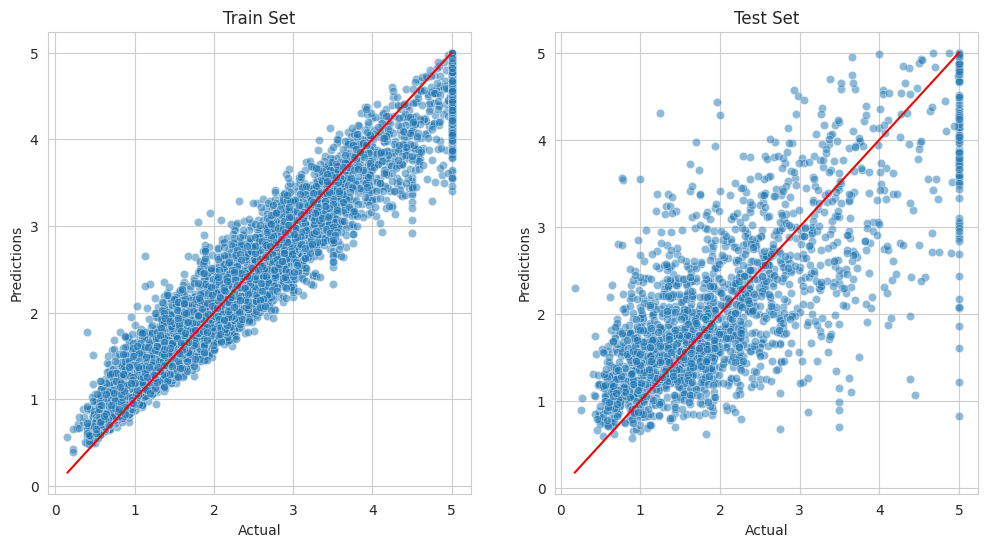

In [61]:
regression_performance(X_train, y_train, X_test, y_test, pipeline)
regression_evaluation_plots(X_train, y_train, X_test, y_test, 
                            pipeline, alpha_scatter=0.5)

---

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> 

### Gradient Boosting

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> 

You can refer back to the Algorithms lesson to refresh the algorithms we will cover. We are not going deep into the mathematical functions; the idea is to present the concept and the algorithm application.

* Gradient boosting is a type of machine learning boosting. The idea of a boosting technique is based on building a sequence of initially weak models into increasingly more powerful models. You add the Models sequentially until no further improvements can be made. Gradient boosting aims to minimize the loss function by adding weak learners using a gradient of a loss function that captures the performance of a model.

We import the algorithms. Find the documentation here for both, [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html).
* We will import both but will use  `GradientBoostingClassifier` for the exercise.

In [62]:
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import GradientBoostingRegressor

Let's consider the iris dataset again for the classification task.

In [63]:
df_clf.head()

,sepal_length,sepal_width,petal_length,petal_width,species
33,5.5,4.2,1.4,0.2,setosa
16,5.4,3.9,1.3,0.4,setosa
43,5.0,3.5,1.6,0.6,setosa
129,7.2,3.0,5.8,1.6,virginica
50,7.0,3.2,4.7,1.4,versicolor


As usual, we split the data into train and test sets, considering 'species' as the target variable.

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(
                                    df_clf.drop(['species'],axis=1),
                                    df_clf['species'],
                                    test_size=0.2,
                                    random_state=101
                                    )

print("* Train set:", X_train.shape, y_train.shape, "\n* Test set:",  X_test.shape, y_test.shape)

* Train set: (84, 4) (84,) 
* Test set: (21, 4) (21,)


The pipeline is similar to that used in the  previous section where we considered the iris dataset.
* There are 3 steps: feature scaling, feature selection and modelling, and here we consider the Gradient Boosting Classifier.

In [65]:
from sklearn.pipeline import Pipeline

### Feat Scaling
from sklearn.preprocessing import StandardScaler

### Feat Selection
from sklearn.feature_selection import SelectFromModel

### ML algorithms 
from sklearn.ensemble import GradientBoostingClassifier 


def pipeline_gradient_boost_clf():
  pipeline = Pipeline([
      ( "feat_scaling",StandardScaler() ),
      ( "feat_selection",SelectFromModel(GradientBoostingClassifier(random_state=101)) ),
      ( "model", GradientBoostingClassifier(random_state=101)),

    ])

  return pipeline

We fit the pipeline with the train set.

In [66]:
pipeline = pipeline_gradient_boost_clf()
pipeline.fit(X_train, y_train)

,steps,"[('feat_scaling', ...), ('feat_selection', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,estimator,GradientBoost...dom_state=101)
,threshold,None
,prefit,False
,norm_order,1


And check feature importance using the same function we used previously since, for this algorithm, feature importance is assessed using the same attribute
* Note it considers only petal_length. Note also the difference; the same data in the decision tree had 2 features as the most important features. That happens since different algorithms have different mechanisms.

* These are the 1 most important features in descending order. The model was trained on them: 
['petal_length']


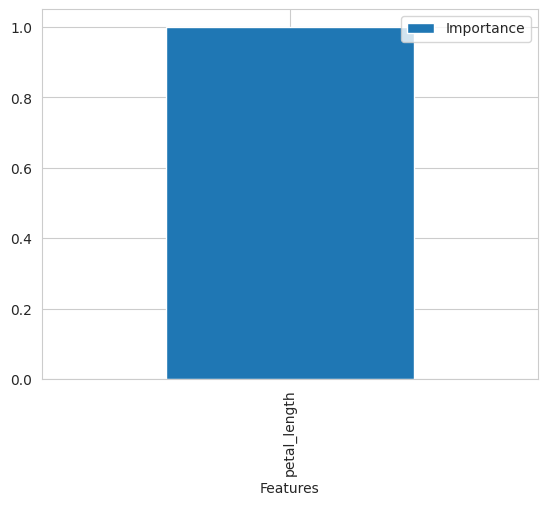

In [67]:
feature_importance_tree_based_models(model = pipeline['model'],
                                     columns =  X_train.columns[pipeline['feat_selection'].get_support()]
                                     )

Let's evaluate the data using the same custom function that shows the confusion matrix and classification report for the train and test sets
* The results are the same compared to a Decision Tree (considering, the same dataset).
* The only difference is that we needed only 1 feature to reach that result for the Gradient Boost; for the decision tree, we needed 2. So the Gradient Boost is better for this data since it is simpler and easier to have a system with fewer features.

In [68]:
clf_performance(X_train=X_train, y_train=y_train,
                X_test=X_test, y_test=y_test,
                pipeline=pipeline,
                label_map= df_clf['species'].unique()
                )

#### Train Set #### 

---  Confusion Matrix  ---
                      Actual setosa Actual virginica Actual versicolor
Prediction setosa                30                0                 0
Prediction virginica              0               26                 0
Prediction versicolor             0                0                28


---  Classification Report  ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        30
   virginica       1.00      1.00      1.00        26
  versicolor       1.00      1.00      1.00        28

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84
 

#### Test Set ####

---  Confusion Matrix  ---
                      Actual setosa Actual virginica Actual versicolor
Prediction setosa                 8                0                 0
Prediction virginica              0                7         

---

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png">  

### Ada Boost

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> 

You can refer back to the Algorithms lesson to refresh the algorithms we will cover. We are not going deep into the mathematical functions; the idea is to present the concept and the algorithm application.


* AdaBoost (or Adaptive Boosting) is an ensemble learning used to build a strong model from several weak models. It uses multiple iterations to generate a single strong learner by iteratively adding weak learners. The result is a model that has higher accuracy than the weak learner itself.

We import the algorithms. Find the documentation here for both, [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html).


* We will import both but will use `AdaBoostRegressor` for the exercise.

In [69]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

 We will use the California Housing dataset to fit an ML pipeline to predict the sales price using the Ada Boost Algorithm.

In [70]:
df_reg.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
16086,5.6204,36.0,6.110738,0.979866,742.0,2.489933,37.73,-122.49,4.06200
8816,11.6677,37.0,7.605634,0.950704,366.0,2.577465,33.75,-118.32,5.00001
7175,2.4375,47.0,4.896154,1.015385,1193.0,4.588462,34.05,-118.19,1.22900
16714,4.3218,17.0,5.805461,1.017065,941.0,3.211604,35.51,-120.68,2.09100
14491,10.0707,22.0,7.906818,1.018182,1252.0,2.845455,32.85,-117.24,5.00001


We split the train and test sets. The target variable is 'price'

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(
                                    df_reg.drop(['price'],axis=1),
                                    df_reg['price'],
                                    test_size=0.2,
                                    random_state=101
                                    )

print("* Train set:", X_train.shape, y_train.shape, "\n* Test set:",  X_test.shape, y_test.shape)

* Train set: (8256, 8) (8256,) 
* Test set: (2064, 8) (2064,)


We create the pipeline using the same steps as previously but now considering the Ada Boost Regressor.

In [72]:
from sklearn.pipeline import Pipeline

### Feat Scaling
from sklearn.preprocessing import StandardScaler

### Feat Selection
from sklearn.feature_selection import SelectFromModel

### ML algorithms 
from sklearn.ensemble import AdaBoostRegressor

def pipeline_adaboost_reg():
  pipeline = Pipeline([
      ( "feat_scaling",StandardScaler() ),
      ( "feat_selection",SelectFromModel(AdaBoostRegressor(random_state=101)) ),
      ( "model", AdaBoostRegressor(random_state=101)),

    ])

  return pipeline


We fit the data to the train set (in the same manner we did previously).

In [73]:
pipeline = pipeline_adaboost_reg()
pipeline.fit(X_train, y_train)

,steps,"[('feat_scaling', ...), ('feat_selection', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,estimator,AdaBoostRegre...dom_state=101)
,threshold,None
,prefit,False
,norm_order,1


And assess feature importance using our custom function
* Note this pipeline selects four variables to train the model: `['MedInc', 'Longitude', 'Latitude', 'AveOccup']`

* These are the 4 most important features in descending order. The model was trained on them: 
['MedInc', 'Longitude', 'Latitude', 'AveOccup']


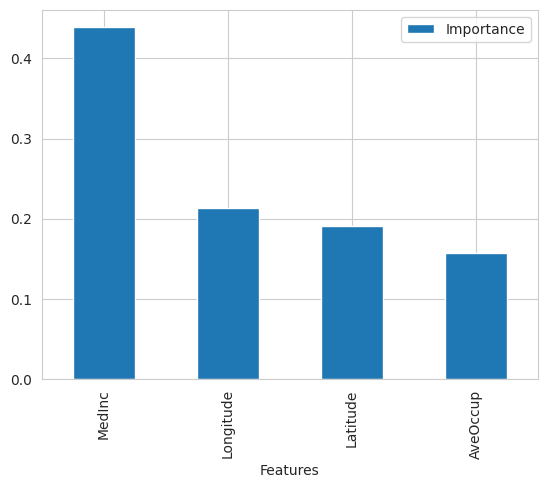

In [74]:
feature_importance_tree_based_models(model = pipeline['model'],
                                     columns =  X_train.columns[pipeline['feat_selection'].get_support()])

We now evaluate the data using the custom function. 
* The R2 score on the train set is 0.48, and on the test set is 0.46. The performance is poor, but the difference between train and test is smaller than seen for Random Forest.
* We note for the actual vs predictions plots, that in the train set, the dots are around the diagonal line (not as close as for Random Forest). 
* Following the diagonal line means the predictions tend to follow the actual value.

Model Evaluation 

* Train Set
R2 Score: 0.481
Mean Absolute Error: 0.708
Mean Squared Error: 0.698
Root Mean Squared Error: 0.835


* Test Set
R2 Score: 0.461
Mean Absolute Error: 0.703
Mean Squared Error: 0.702
Root Mean Squared Error: 0.838




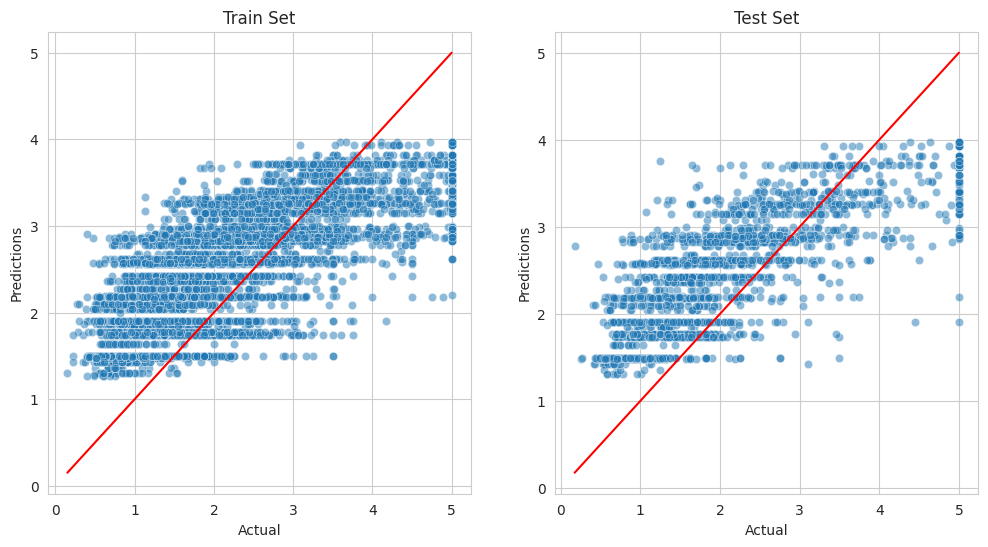

In [75]:
regression_performance(X_train, y_train, X_test, y_test,pipeline)
regression_evaluation_plots(X_train, y_train, X_test, y_test, 
                            pipeline, alpha_scatter=0.5)

---

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png">  

### XG Boost

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> You can refer back to the Algorithms lesson to refresh the algorithms we will cover. We are not going deep into the mathematical functions; the idea is to present the concept and the algorithm application.


* XGBoost stands for eXtreme Gradient Boosting and is an extension to gradient-boosted decision trees, specially designed to improve speed and performance. It has regularisation features that help to avoid over-fitting. It is a dedicated software library that you should install, it doesn't belong to the Scikit-learn library.

We import the algorithms. Find [here](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn) the documentation for both
* We will import both but will use `XGBClassifier` for the exercise.

In [76]:
from xgboost import XGBRegressor
from xgboost import XGBClassifier

Let's consider the iris dataset again for the classification task.

In [77]:
df_clf.head()

,sepal_length,sepal_width,petal_length,petal_width,species
33,5.5,4.2,1.4,0.2,setosa
16,5.4,3.9,1.3,0.4,setosa
43,5.0,3.5,1.6,0.6,setosa
129,7.2,3.0,5.8,1.6,virginica
50,7.0,3.2,4.7,1.4,versicolor


Let's split the data into train and test sets, where the target variable is 'species' 

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_clf['species_encoded'] = le.fit_transform(df_clf['species'])

X_train, X_test, y_train, y_test = train_test_split(
    df_clf.drop(['species','species_encoded'],axis=1),
    df_clf['species_encoded'],
    test_size=0.2,
    random_state=101
)

print("* Train set:", X_train.shape, y_train.shape, "\n* Test set:",  X_test.shape, y_test.shape)

* Train set: (84, 4) (84,) 
* Test set: (21, 4) (21,)


We create the pipeline using the same steps as previously but now considering XGBoost

In [90]:
from sklearn.pipeline import Pipeline

### Feat Scaling
from sklearn.preprocessing import StandardScaler


### Feat Selection
from sklearn.feature_selection import SelectFromModel

### ML algorithms 
from xgboost import XGBClassifier


def pipeline_xgboost_clf():
  pipeline = Pipeline([
      ( "feat_scaling",StandardScaler() ),
      ( "feat_selection",SelectFromModel(XGBClassifier(random_state=101)) ),
      ( "model", XGBClassifier(random_state=101)),

    ])

  return pipeline

We fit the pipeline to the train data.

In [91]:
pipeline = pipeline_xgboost_clf()
pipeline.fit(X_train, y_train)

,steps,"[('feat_scaling', ...), ('feat_selection', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,estimator,"XGBClassifier...ree=None, ...)"
,threshold,None
,prefit,False
,norm_order,1


And assess the feature importance
* Note only petal_length is relevant to fit the model. 

* These are the 1 most important features in descending order. The model was trained on them: 
['petal_length']


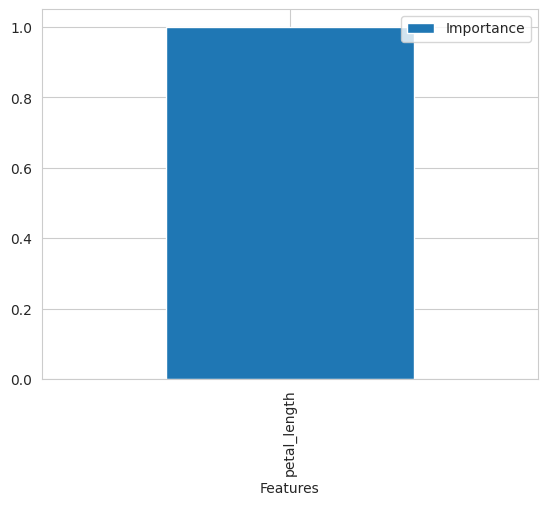

In [93]:
feature_importance_tree_based_models(model = pipeline['model'],
                                     columns =  X_train.columns[pipeline['feat_selection'].get_support()]
                                     )

Let's assess the pipeline performance
* The performance is the same as Gradient Boost on the train and test set. So for Classification, of the three algorithms we tested, decision tree, gradient boost, and XG boost - the last 2 are good candidates and best suit the data. However, we will study another method to test more algorithms simultaneously and avoid this segregated analysis we are doing now.

In [94]:
clf_performance(X_train=X_train, y_train=y_train,
                X_test=X_test, y_test=y_test,
                pipeline=pipeline,
                label_map= df_clf['species'].unique() 
                )

#### Train Set #### 

---  Confusion Matrix  ---
                      Actual setosa Actual virginica Actual versicolor
Prediction setosa                30                0                 0
Prediction virginica              0               26                 0
Prediction versicolor             0                0                28


---  Classification Report  ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        30
   virginica       1.00      1.00      1.00        26
  versicolor       1.00      1.00      1.00        28

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84
 

#### Test Set ####

---  Confusion Matrix  ---
                      Actual setosa Actual virginica Actual versicolor
Prediction setosa                 8                0                 0
Prediction virginica              0                7         

---

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png">  

### ExtraTree

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> 

You can refer back to the Algorithms lesson to refresh the algorithms we will cover. We are not going deep into the mathematical functions; the idea is to present the concept and the algorithm application.


* Extra Trees (or Extremely Randomized Trees) is an ensemble algorithm. It works by creating a large number of unpruned trees. Predictions are made by averaging the prediction of the decision trees when it is regression or using majority voting when it is classification.

We import the algorithms. Find the documentation here for both, [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html).
* We will import both but will use `ExtraTreesRegressor` for the exercise.

In [95]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
We will use the California Housing dataset to fit an ML pipeline to predict the sales price.

In [96]:
df_reg.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
16086,5.6204,36.0,6.110738,0.979866,742.0,2.489933,37.73,-122.49,4.06200
8816,11.6677,37.0,7.605634,0.950704,366.0,2.577465,33.75,-118.32,5.00001
7175,2.4375,47.0,4.896154,1.015385,1193.0,4.588462,34.05,-118.19,1.22900
16714,4.3218,17.0,5.805461,1.017065,941.0,3.211604,35.51,-120.68,2.09100
14491,10.0707,22.0,7.906818,1.018182,1252.0,2.845455,32.85,-117.24,5.00001


Let's split the data into train and test sets using 'price' as a target variable 

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(
                                    df_reg.drop(['price'],axis=1),
                                    df_reg['price'],
                                    test_size=0.2,
                                    random_state=101
                                    )

print("* Train set:", X_train.shape, y_train.shape, "\n* Test set:",  X_test.shape, y_test.shape)

* Train set: (8256, 8) (8256,) 
* Test set: (2064, 8) (2064,)


We create the pipeline using the same steps as previously but now considering the Extra Tree Regressor.

In [98]:
from sklearn.pipeline import Pipeline

### Feat Scaling
from sklearn.preprocessing import StandardScaler

### Feat Selection
from sklearn.feature_selection import SelectFromModel

### ML algorithms 
from sklearn.ensemble import ExtraTreesRegressor

def pipeline_extra_tree_reg():
  pipeline = Pipeline([
      ( "feat_scaling",StandardScaler() ),
      ( "feat_selection",SelectFromModel(ExtraTreesRegressor(random_state=101)) ),
      ( "model", ExtraTreesRegressor(random_state=101)),

    ])

  return pipeline


We fit the pipeline with the train set.

In [99]:
pipeline = pipeline_extra_tree_reg()
pipeline.fit(X_train, y_train)

,steps,"[('feat_scaling', ...), ('feat_selection', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,estimator,ExtraTreesReg...dom_state=101)
,threshold,None
,prefit,False
,norm_order,1


And evaluate feature importance using our custom function
* It used `['MedInc']` as the only important feature.
* Just to reinforce, different algorithms consider different features to find patterns in the data, Random Forest selected one more feature `AveOccup`, and Ada Boost added to the selected list the `longitude` and `latitude`.

* These are the 1 most important features in descending order. The model was trained on them: 
['MedInc']


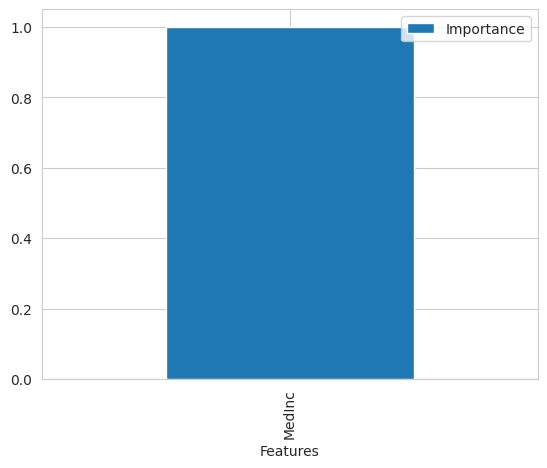

In [100]:
feature_importance_tree_based_models(model = pipeline['model'],
                                     columns =  X_train.columns[pipeline['feat_selection'].get_support()])

Let's now evaluate the pipeline
* Note the pipeline was good on the train set (R2 score of 0.87), and on the test set, it was poor (R2 score of 0.18 is poor compared to a score of 0.87 in the train set).
* This is a sign the model overfits since it performs better in the train set and doesn't generalise well to other sets, like the test set.
* After all, for this dataset and among Random Forest, Ada Boost and Extra Tree, Ada Boost performed better since it can generalize better (the difference between performance on train and test set is smaller).
* Again, we analyse each algorithm separately for 

Model Evaluation 

* Train Set
R2 Score: 0.872
Mean Absolute Error: 0.184
Mean Squared Error: 0.172
Root Mean Squared Error: 0.415


* Test Set
R2 Score: 0.183
Mean Absolute Error: 0.761
Mean Squared Error: 1.065
Root Mean Squared Error: 1.032




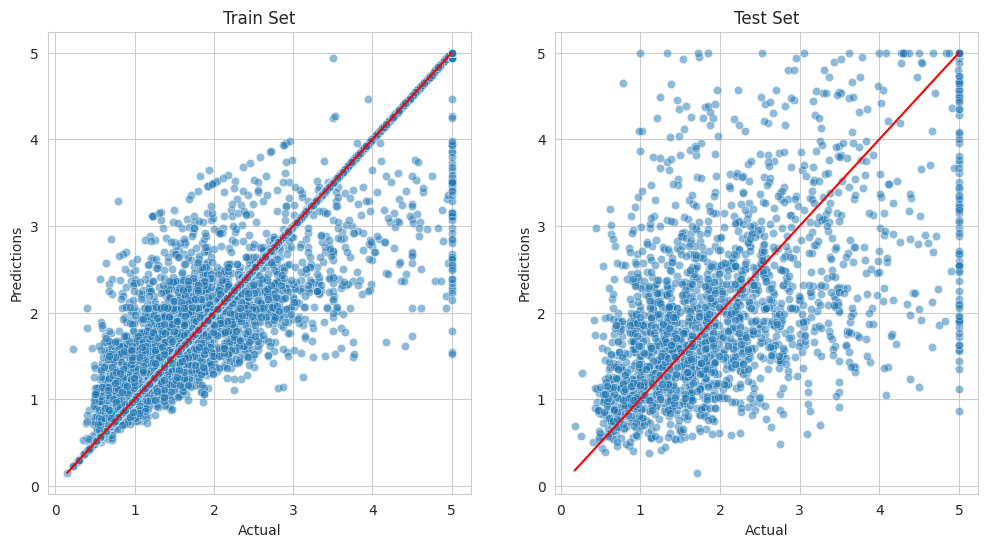

In [101]:
regression_performance(X_train, y_train, X_test, y_test,pipeline)
regression_evaluation_plots(X_train, y_train, X_test, y_test, 
                            pipeline, alpha_scatter=0.5)